In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm, colorbar, imshow, meshgrid, title

In [2]:
class Perceptron:
    def __init__(self, input_count, output_count, learning_rate):
        self.input_count = input_count
        self.output_count = output_count
        self.final_outputs = None
        self.output_errors = None

        self.weights = np.random.normal(
            .0, pow(self.input_count, -.5), (self.output_count, self.input_count)
        )
        self.output = None
        self.learning_rate = learning_rate
        self.activation_function = sp.special.expit

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).transpose()
        targets = np.array(targets_list, ndmin=2).transpose()
        final_inputs = np.dot(self.weights, inputs)
        self.final_outputs = self.activation_function(final_inputs)
        self.output_errors = targets - self.final_outputs
        self.weights += self.learning_rate * np.dot(
            (self.output_errors * self.final_outputs * (1. - self.final_outputs)),
            np.transpose(inputs)
        )

    def predict(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).transpose()
        final_inputs = np.dot(self.weights, inputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

[[1.04626731]]


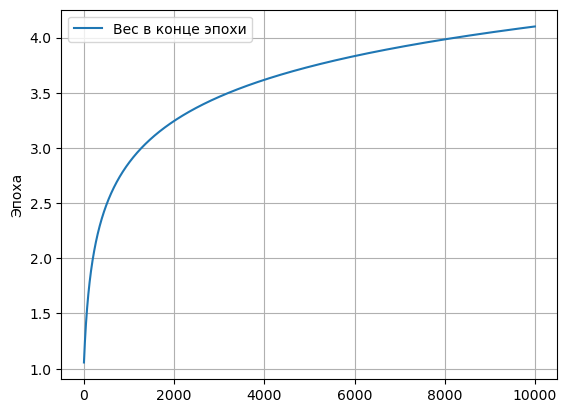

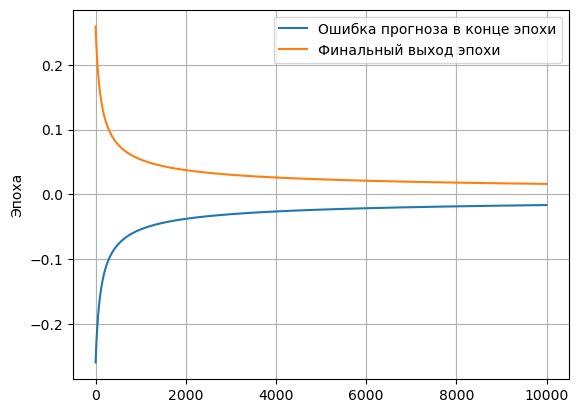

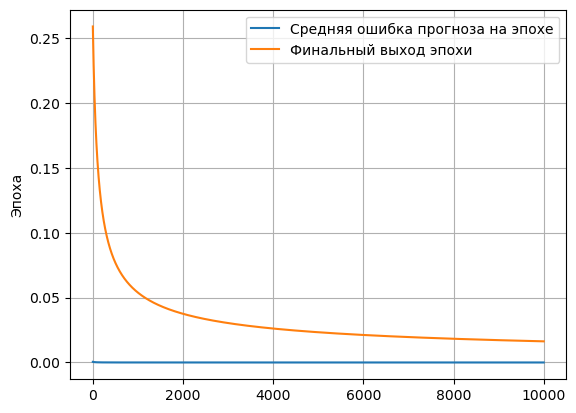

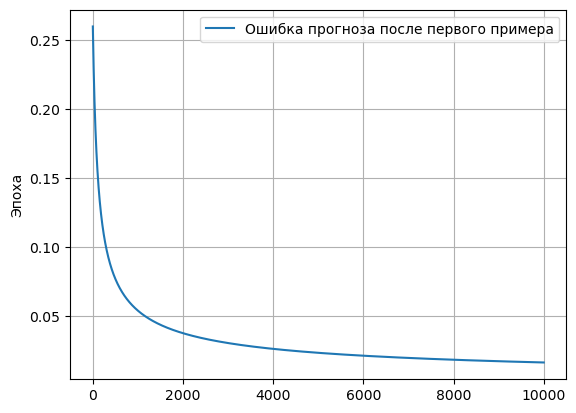

[[4.10048727]]
[[0.98370531]]
[[8.28133917e-179]]


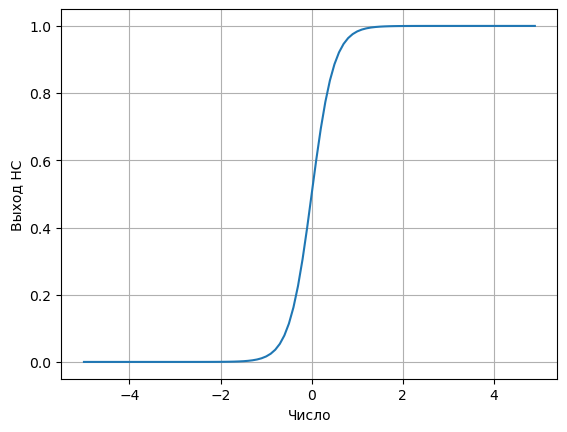

In [3]:
input_count = 1
output_count = 1
learning_rate = .1
simple_perceptron = Perceptron(input_count, output_count, learning_rate)
print(simple_perceptron.weights)

weights = {"positive": [], "negative": []}
outputs = {"positive": [], "negative": []}
output_errors = {"positive": [], "negative": [], "mean": []}

X_train = [[1],
           [-1]]
y_train = [[1],
           [0]]

for epoch in range(10_000):
    simple_perceptron.train(X_train[0], y_train[0])

    weights["positive"].append(simple_perceptron.weights.copy())
    weights["positive"].append(simple_perceptron.final_outputs.copy())
    error_1 = simple_perceptron.output_errors.copy()
    output_errors["positive"].append(error_1)

    simple_perceptron.train(X_train[1], y_train[1])
    weights["negative"].append(simple_perceptron.weights.copy())
    outputs["negative"].append(simple_perceptron.final_outputs.copy())
    error_2 = simple_perceptron.output_errors.copy()
    output_errors["negative"].append(error_2)

    output_errors["mean"].append(np.mean([error_1, error_2]))


epoch_weights = np.array(weights["negative"])
final_outputs = np.array(outputs["negative"])
epoch_errors = np.array(output_errors["mean"])

epoch_weights = epoch_weights.reshape(len(epoch_weights))
final_outputs = final_outputs.reshape(len(final_outputs))
epoch_errors = epoch_errors.reshape(len(epoch_errors))

plt.plot(epoch_weights, label="Вес в конце эпохи")
plt.ylabel("Эпоха")
plt.legend()
plt.grid()
plt.show()

final_errors = np.array(output_errors["negative"])
final_errors = final_errors.reshape(len(final_errors))

plt.plot(final_errors, label="Ошибка прогноза в конце эпохи")
plt.plot(final_outputs, label="Финальный выход эпохи")
plt.ylabel("Эпоха")
plt.legend()
plt.grid()
plt.show()

plt.plot(epoch_errors, label="Средняя ошибка прогноза на эпохе")
plt.plot(final_outputs, label="Финальный выход эпохи")
plt.ylabel("Эпоха")
plt.legend()
plt.grid()
plt.show()

start_errors = np.array(output_errors["positive"])
start_errors = start_errors.reshape(len(start_errors))

plt.plot(start_errors, label="Ошибка прогноза после первого примера")
plt.ylabel("Эпоха")
plt.legend()
plt.grid()
plt.show()

print(simple_perceptron.weights)
print(simple_perceptron.predict([1.]))
print(simple_perceptron.predict([-100.]))

outputs = [simple_perceptron.predict([_])[0] for _ in np.arange(-5., 5., .1)]

plt.plot(np.arange(-5., 5., .1), outputs)
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.grid()
plt.show()

[[0.01144208]]
[[0.49685551]]
[[0.50314449]]
[[0.98855792]]
[[0.78284628]]
[[0.34498314]]
[[0.21715372]]


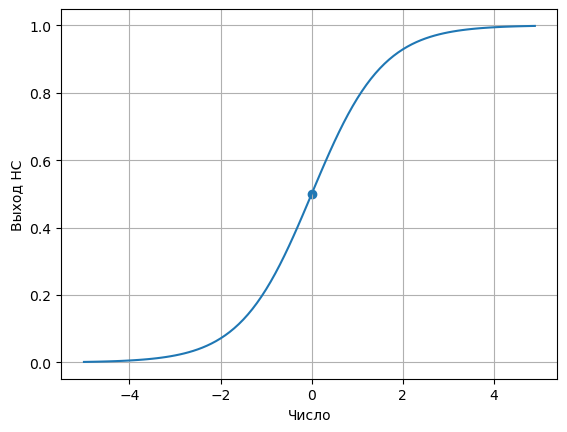

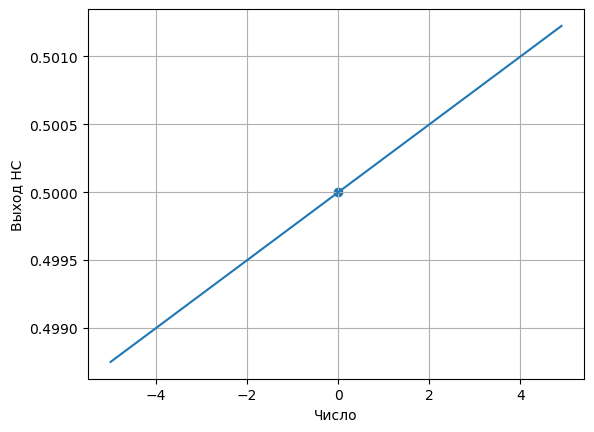

In [4]:
# =============================================================================
# Задача логического "ИЛИ"
# =============================================================================
input_count = 2
output_count = 1
learning_rate = .1

simple_perceptron = Perceptron(input_count, output_count, learning_rate)

X_train = [[-1, -1],
           [-1, 1],
           [1, -1],
           [1, 1]]
y_train = [[0],
           [1],
           [1],
           [1]]

for epoch in range(10_000):
    for _ in range(len(X_train)):
        simple_perceptron.train(X_train[_], y_train[_])

for _ in range(len(X_train)):
    print(simple_perceptron.predict(X_train[_]))

input_count = 1
output_count = 1
learning_rate = .1

simple_perceptron = Perceptron(input_count, output_count, learning_rate)

for epoch in range(1_000):
    simple_perceptron.train([1.], [1])
    simple_perceptron.train([-.5], [1])
    simple_perceptron.train([-1.], [0])

print(simple_perceptron.predict([1.]))
print(simple_perceptron.predict([-.5]))
print(simple_perceptron.predict([-1.]))

outputs = [simple_perceptron.predict([_])[0] for _ in np.arange(-5., 5., .1)]

plt.plot(np.arange(-5., 5., .1), outputs)
plt.scatter(0, simple_perceptron.predict([0]))
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.grid()
plt.show()

outputs = []
for _ in np.arange(-5., 5., .1):
    simple_perceptron.weights = [[.001]]
    output = simple_perceptron.predict([_])
    outputs.append(output[0])

plt.plot(np.arange(-5., 5., .1), outputs)
plt.scatter(0, simple_perceptron.predict([0]))
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.grid()
plt.show()

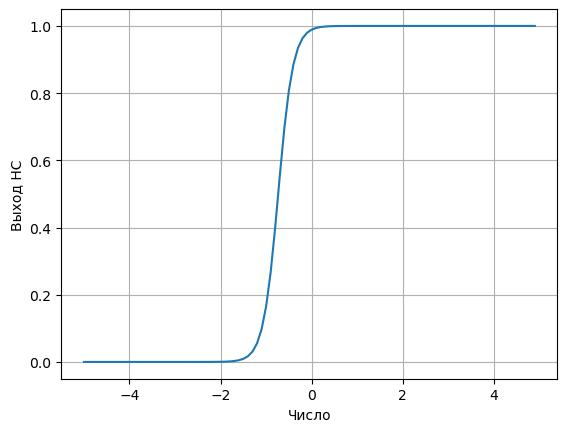

In [5]:
input_nodes = 2
output_nodes = 1
learning_rate = .3

simple_perceptron = Perceptron(input_nodes, output_nodes, learning_rate)

for epoch in range(1_000):
    simple_perceptron.train([1., 1], [1])
    simple_perceptron.train([-.5, 1], [1])
    simple_perceptron.train([-1., 1], [0])

outputs = [
    simple_perceptron.predict([_, 1])[0] for _ in np.arange(-5., 5., .1)
]
plt.plot(np.arange(-5., 5., .1), outputs)
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.grid()
plt.show()

In [6]:
class Perceptron_V2:
    def __init__(self, input_count, output_count, learning_rate):
        self.input_count = 1 + input_count
        self.output_count = output_count

        self.weights = np.random.normal(
            .0, pow(self.input_count, -.5), (self.output_count, self.input_count)
        )
        self.learning_rate = learning_rate
        self.activation_function = sp.special.expit

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list + [1], ndmin=2).transpose()
        targets = np.array(targets_list, ndmin=2).transpose()
        final_inputs = np.dot(self.weights, inputs)
        self.final_outputs = self.activation_function(final_inputs)
        self.output_errors = targets - self.final_outputs
        self.weights += self.learning_rate * np.dot(
            (self.output_errors * self.final_outputs * (1. - self.final_outputs)),
            np.transpose(inputs)
        )

    def predict(self, inputs_list):
        inputs = np.array(inputs_list + [1], ndmin=2).transpose()
        final_inputs = np.dot(self.weights, inputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

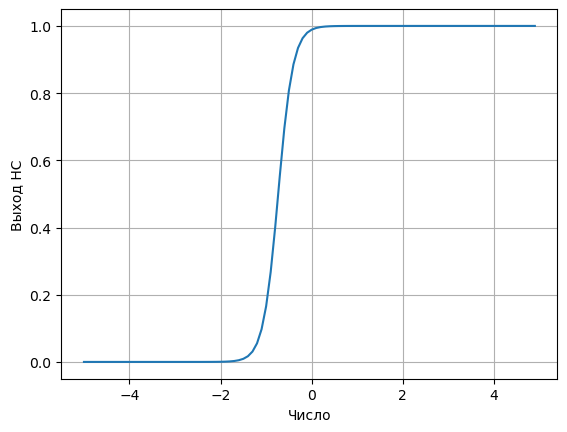

In [7]:
input_nodes = 1
output_nodes = 1
learning_rate = .3

simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

for epoch in range(1_000):
    simple_perceptron.train([1.], [1])
    simple_perceptron.train([-.5], [1])
    simple_perceptron.train([-1.], [0])

outputs = [
    simple_perceptron.predict([_])[0] for _ in np.arange(-5., 5., .1)
]
plt.plot(np.arange(-5., 5., .1), outputs)
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.grid()
plt.show()

[[0.02125649]]
[[0.50954941]]
[[0.49045059]]
[[0.97874351]]


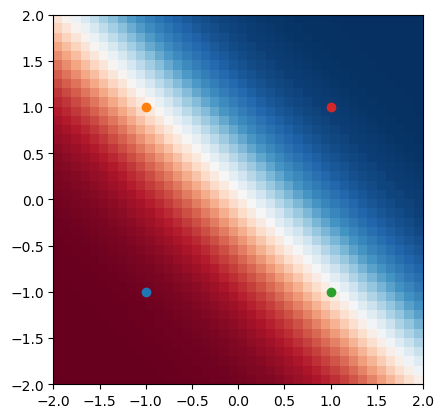

In [8]:
# =============================================================================
# Задача логического "И"
# =============================================================================

input_nodes = 2
output_nodes = 1
learning_rate = .3

simple_perceptron = Perceptron(input_nodes, output_nodes, learning_rate)

for epoch in range(1_000):
    simple_perceptron.train([1, 1], [1])
    simple_perceptron.train([1, -1], [0])
    simple_perceptron.train([-1, 1], [0])
    simple_perceptron.train([-1, -1], [0])

outputs = []
array = np.arange(-2., 2., .1)
X1, X2 = meshgrid(array, array)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = simple_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)

Z = np.array(Z)
im = imshow(Z, cmap=cm.RdBu, extent=[-2, 2, 2, -2])
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)

title("")
plt.ylim(-2, 2)

print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))

[[0.0001013]]
[[0.04454132]]
[[0.04450901]]
[[0.95542635]]


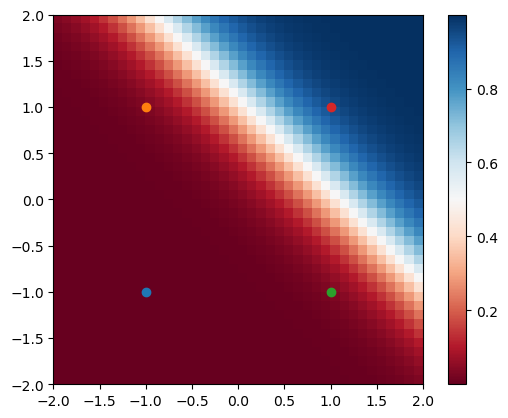

In [9]:
# =============================================================================
# Biased
# =============================================================================
input_nodes = 2
output_nodes = 1
learning_rate = .3

simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

for epoch in range(1_000):
    simple_perceptron.train([1, 1], [1])
    simple_perceptron.train([1, -1], [0])
    simple_perceptron.train([-1, 1], [0])
    simple_perceptron.train([-1, -1], [0])

outputs = []
array = np.arange(-2., 2., .1)
X1, X2 = meshgrid(array, array)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = simple_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)

Z = np.array(Z)
im = imshow(Z, cmap=cm.RdBu, extent=[-2, 2, 2, -2])
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)

colorbar(im)
title("")
plt.ylim(-2, 2)

print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))

/tmp/ipykernel_102431/3187454905.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


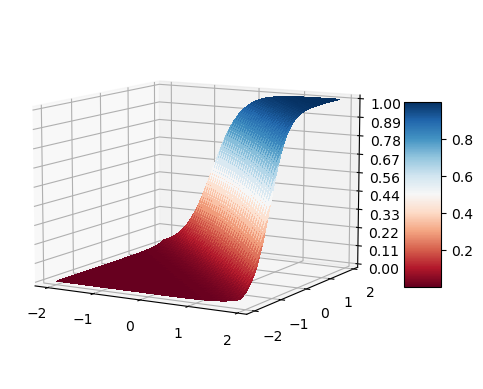

In [10]:
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    X1, X2, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False
)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.view_init(10)
fig.colorbar(surf, shrink=.5, aspect=5)

plt.show()

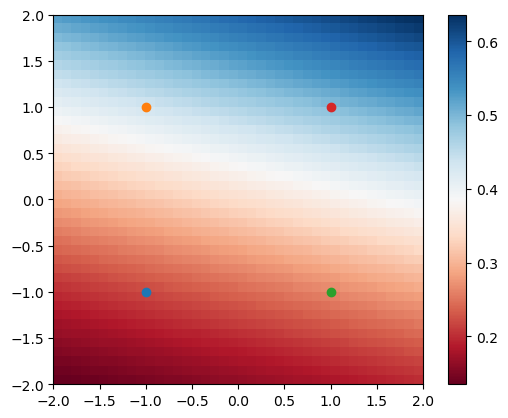

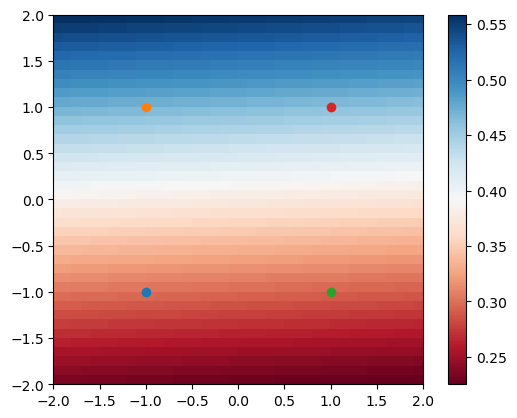

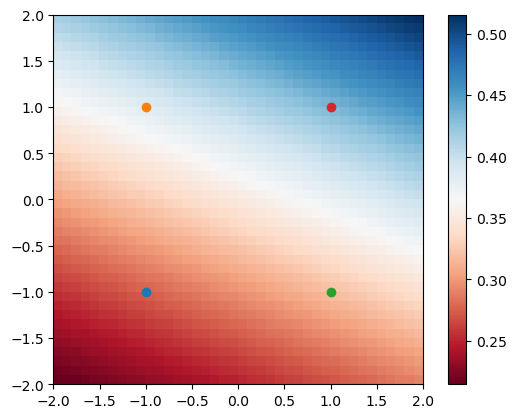

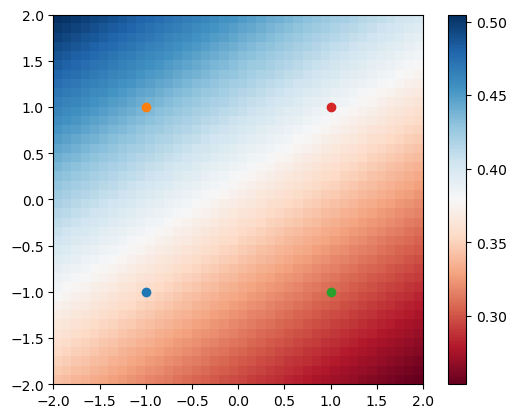

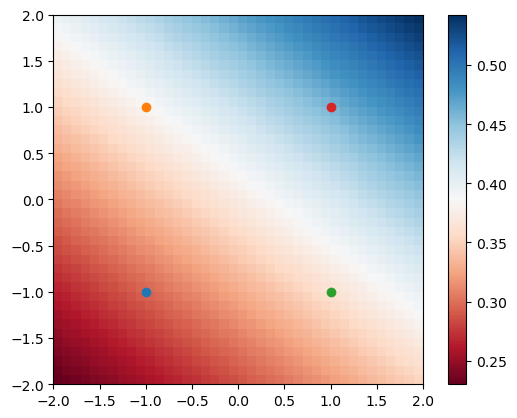

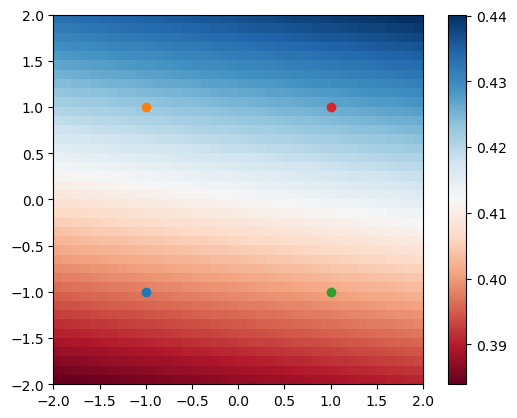

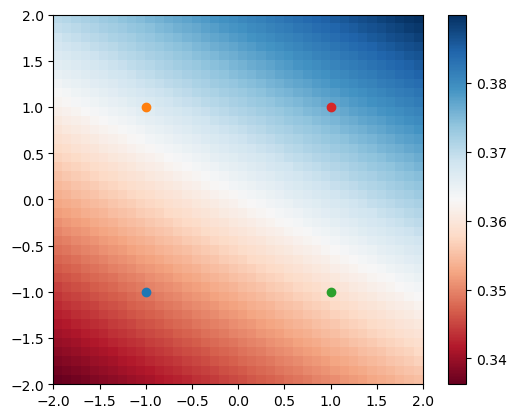

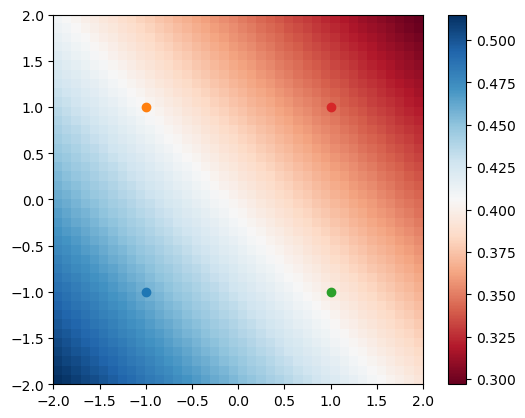

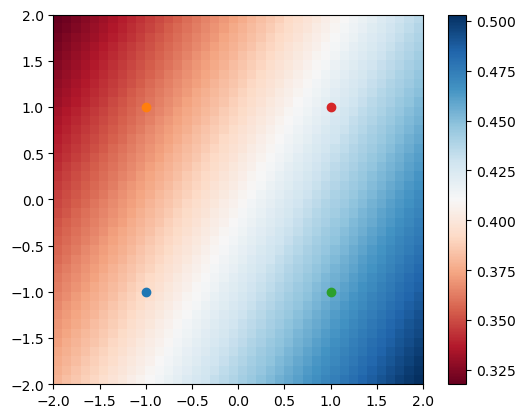

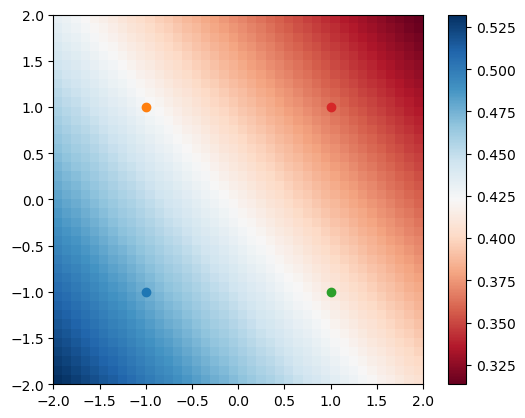

[[0.36049079]]
[[0.40933201]]
[[0.42278405]]
[[0.47381204]]


In [11]:
# =============================================================================
# Задача логического "Исключающего ИЛИ"
# =============================================================================

input_nodes = 2
output_nodes = 1
learning_rate = 1

simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

for _ in range(10):
    if _ % 4 == 0:
        simple_perceptron.train([1, 1], [1])
    if _ % 3 == 0:
        simple_perceptron.train([1, -1], [0])
    if _ % 2 == 0:
        simple_perceptron.train([-1, 1], [0])
    else:
        simple_perceptron.train([-1, -1], [1])

    outputs = []
    array = np.arange(-2., 2., .1)
    X1, X2 = meshgrid(array, array)
    Z = []
    for x2 in X2[:, 0]:
        t = []
        for x1 in X1[0, :]:
            output = simple_perceptron.predict([x1, x2])
            t.append(output[0, 0])
        Z.append(t)

    Z = np.array(Z)
    im = imshow(Z, cmap=cm.RdBu, extent=[-2, 2, 2, -2])
    plt.scatter(-1, -1)
    plt.scatter(-1, 1)
    plt.scatter(1, -1)
    plt.scatter(1, 1)

    colorbar(im)
    title("")
    plt.ylim(-2, 2)
    plt.show()

print(simple_perceptron.predict([1, 1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([-1, -1]))

In [12]:
# =============================================================================
# Back-propagate error
# =============================================================================


class MultiLayerPerceptron_V2:
    def __init__(self, input_count, hidden_count, output_count, learning_rate):
        self.input_count = input_count
        self.hidden_count = hidden_count
        self.output_count = output_count

        self.w_hid_inp = np.random.normal(
            .0, pow(self.input_count, -.5), (self.hidden_count,
                                             1 + self.input_count)
        )
        self.w_hid_out = np.random.normal(
            .0, pow(self.hidden_count, -.5), (self.output_count,
                                              1 + self.hidden_count)
        )

        self.learning_rate = learning_rate
        self.activation_function = sp.special.expit

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list + [1], ndmin=2).transpose()
        targets = np.array(targets_list, ndmin=2).transpose()

        hidden_inputs = np.dot(self.w_hid_inp, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        hidden_outputs = np.append(hidden_outputs, [[1]], axis=0)

        final_inputs = np.dot(self.w_hid_out, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.w_hid_out.transpose(), output_errors)
        self.w_hid_out += self.learning_rate * np.dot(
            (output_errors * final_outputs * (1. - final_outputs)),
            np.transpose(hidden_outputs)
        )

        hidden_errors = hidden_errors[:-1, :]
        hidden_outputs = hidden_outputs[:-1, :]

        self.w_hid_inp += self.learning_rate * np.dot(
            (hidden_errors * hidden_outputs * (1. - hidden_outputs)),
            np.transpose(inputs)
        )

    def predict(self, inputs_list):
        inputs = np.array(inputs_list + [1], ndmin=2).transpose()

        hidden_inputs = np.dot(self.w_hid_inp, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        hidden_outputs = np.append(hidden_outputs, [[1]], axis=0)

        final_inputs = np.dot(self.w_hid_out, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

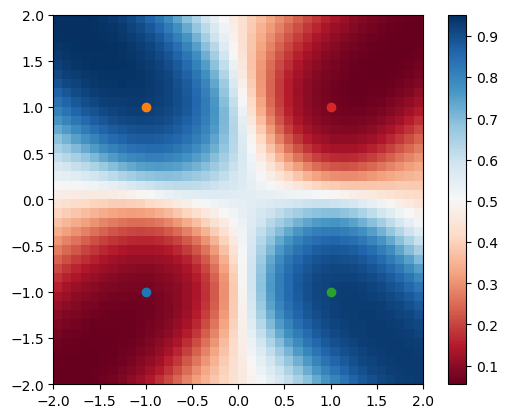

[[0.06974408]]
[[0.92210227]]
[[0.92762963]]
[[0.07896723]]


In [13]:
input_nodes = 2
output_nodes = 1
hidden_count = 20

learning_rate = .01

multilayer_perceptron = MultiLayerPerceptron_V2(
    input_nodes, hidden_count, output_nodes, learning_rate)

for epoch in range(10_000):
    multilayer_perceptron.train([1, 1], [0])
    multilayer_perceptron.train([1, -1], [1])
    multilayer_perceptron.train([-1, 1], [1])
    multilayer_perceptron.train([-1, -1], [0])

outputs = []
array = np.arange(-2., 2., .1)
X1, X2 = meshgrid(array, array)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = multilayer_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)

Z = np.array(Z)
im = imshow(Z, cmap=cm.RdBu, extent=[-2, 2, 2, -2])
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)

colorbar(im)
title("")
plt.ylim(-2, 2)
plt.show()

print(multilayer_perceptron.predict([1, 1]))
print(multilayer_perceptron.predict([1, -1]))
print(multilayer_perceptron.predict([-1, 1]))
print(multilayer_perceptron.predict([-1, -1]))

In [14]:
# =============================================================================
# No Training
# =============================================================================
input_count = 2
hidden_count = 2
output_count = 1
learning_rate = .3

mlp = MultiLayerPerceptron_V2(
    input_count, hidden_count, output_count, learning_rate)
mlp.predict([1, 0])

array([[0.51367382]])

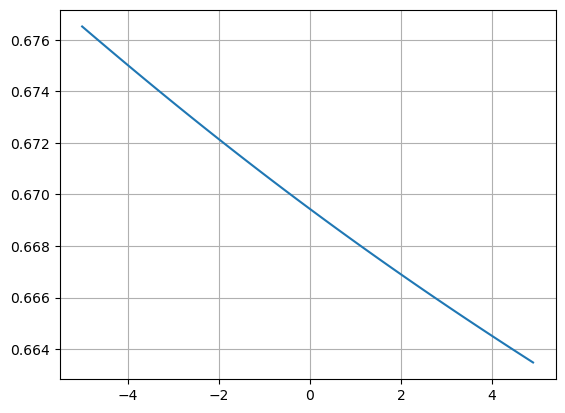

In [15]:
# =============================================================================
# With Training
# =============================================================================
input_count = 1
hidden_count = 2
output_count = 1
learning_rate = .3

mlp = MultiLayerPerceptron_V2(
    input_count, hidden_count, output_count, learning_rate)

for epoch in range(1_000):
    mlp.train([1.], [1])
    mlp.train([0], [0])
    mlp.train([-1.], [1])

outputs = [mlp.predict([_])[0] for _ in np.arange(-5., 5., .1)]

plt.plot(np.arange(-5., 5., .1), outputs)
plt.grid()
plt.show()